In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from distfit import distfit
from fitter import Fitter
from statsmodels.graphics.gofplots import qqplot

In [59]:
# matplotlib params

plt.rcParams.update({'font.size': 14})

In [60]:
# 1. Загрузите файл HR.csv в pandas dataframe

hr_df = pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [61]:
hr_quant = hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']]
hr_quant

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


Условия применения коэффициента корреляции Пирсона:
линейность и монотонность, иначе есть вероятность неверного результата,
также желательно нормальное распределение переменных.

In [39]:
def visual_normality_check(feature_name, df_name):
    #checks quantitive data for normality

    _feature_name = feature_name
    _feature = df_name[_feature_name]

    # hist plot with gaussian norm dist line
    f = Fitter(_feature, distributions=['norm'])
    f.fit()
    f.summary()


    # qqplot
    qqplot(_feature, fit=True, line='s', label=f'QQ-plot for {_feature_name}')

    plt.show()


def statistical_normality_test(feature_name, df_name, alpha):
    from scipy.stats import shapiro
    from scipy.stats import normaltest

    _feature_name = feature_name
    _feature = df_name[_feature_name]
    _alpha = alpha


    # shaporo-wilk test
    _sh_stat, _sh_p = shapiro(_feature)
    print(
        f'Shapiro-Wilk normality test for {_feature_name} \n'
        f'Statistics={round(_sh_stat,3)}, p-value={round(_sh_p, 3)}% \n'
    )
    # shaporo-wilk test interpret
    if _sh_p > _alpha:
        print('Shapiro-Wilk: Sample looks Gaussian (fail to reject H0) \n')
    else:
        print('Shapiro-Wilk: Sample does not look Gaussian (reject H0) \n')


    # D’Agostino’s K^2 Test

    _d_stat, _d_p = normaltest(hr_quant['satisfaction_level'])
    print(
        f'D’Agostino’s K^2 normality Test test for {_feature_name} \n'
        f'Statistics={round(_d_stat,3)}, p-value={round(_d_p, 3)}% \n'
    )
    # D’Agostino’s K^2 Test interpret
    alpha = 0.05
    if _d_p > alpha:
        print('D’Agostino’s: Sample looks Gaussian (fail to reject H0) \n')
    else:
        print('D’Agostino’s: Sample does not look Gaussian (reject H0) \n')



Shapiro-Wilk normality test for satisfaction_level 
Statistics=0.952, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (reject H0) 

D’Agostino’s K^2 normality Test test for satisfaction_level 
Statistics=1200.958, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (reject H0) 

Shapiro-Wilk normality test for last_evaluation 
Statistics=0.952, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (reject H0) 

D’Agostino’s K^2 normality Test test for last_evaluation 
Statistics=1200.958, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (reject H0) 

Shapiro-Wilk normality test for number_project 
Statistics=0.922, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (reject H0) 

D’Agostino’s K^2 normality Test test for number_project 
Statistics=1200.958, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (reject H0) 

Shapiro-Wilk normality test for average_montly_hours 
Statistics=0.963, p-value=0.0% 

Shapiro-Wilk: Sample does not loo

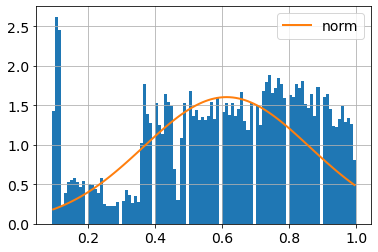

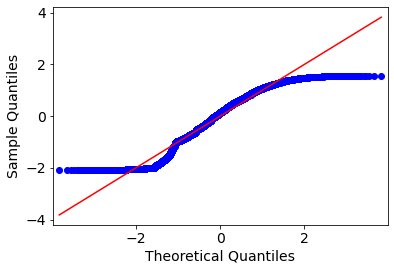

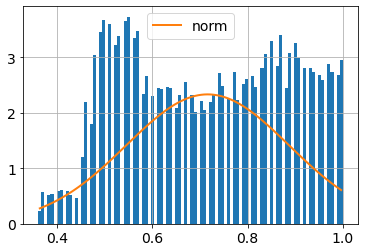

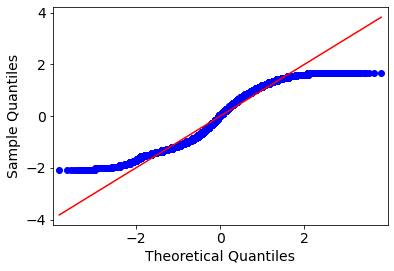

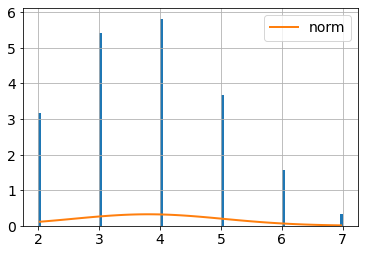

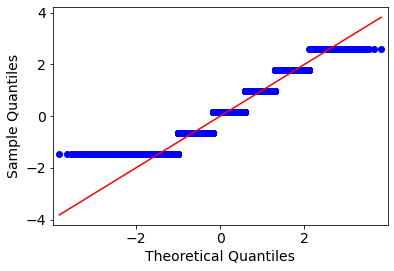

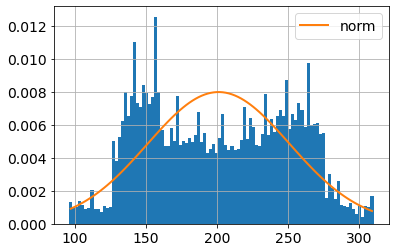

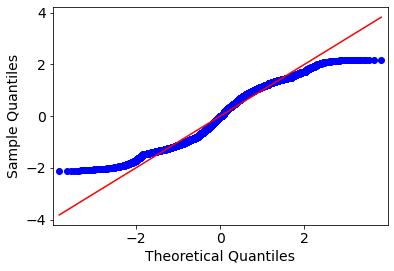

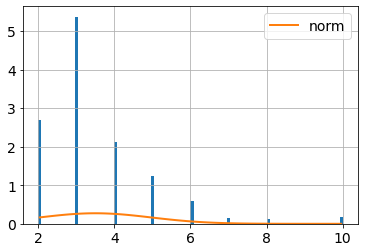

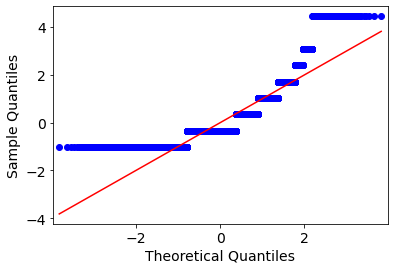

In [40]:
quant_column_names = hr_quant.columns.to_list()
for col in quant_column_names:
    statistical_normality_test(feature_name=col, df_name=hr_df, alpha=0.05)
    visual_normality_check(feature_name=col, df_name=hr_df)

Вывод: значения признаков не распределены нормально

In [43]:
# dist = distfit()
# dist.fit_transform(hr_quant['time_spend_company'])
# dist.plot()
#

In [69]:
# # All scores of the tested distributions
# print(dist.summary)
#
# # Distribution parameters for best fit
# dist.model
#
# # Make plot
# dist.plot_summary()

In [70]:
# f = Fitter(hr_quant['satisfaction_level'], distributions=['norm'])
# f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
# f.summary()


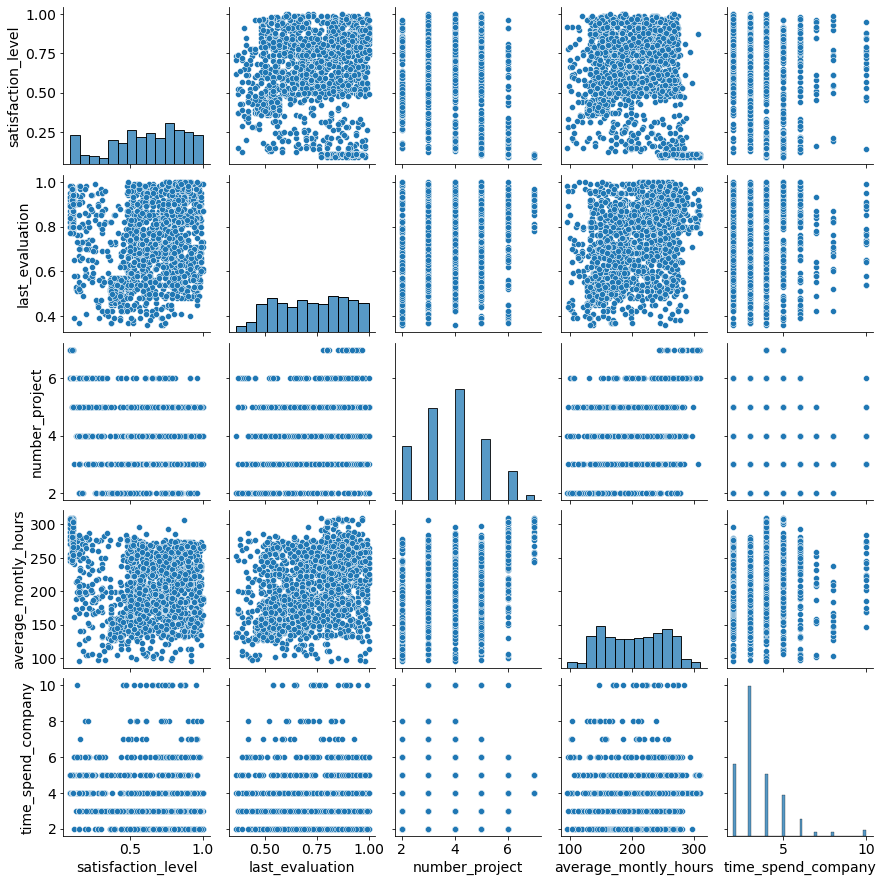

<Figure size 900x900 with 0 Axes>

In [80]:
# Посмотрим соответствуют ли наши данные условиям для расчета коэф. Пирсона
from IPython.display import Image

sns_plot = sns.pairplot(hr_quant.sample(frac=0.1))
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns
Image(filename='pairplot.png') # Show pairplot as image

Вывод: линейной взаимосвязи между значениями признаков нет.
Имеющиейся графики не могут дать четкого представления о характере взаимосвязи между признаками.
Скорее всего признаки практически не скоррелированы.

Учитывая, что нет линейной взаимосвязи, и признаки не распределены нормально мы не можем использовать коэф. Пирсона.
Для анализа корреляции нужно использовать непараметрический метод, например, коэф. Спирмена


<AxesSubplot:>

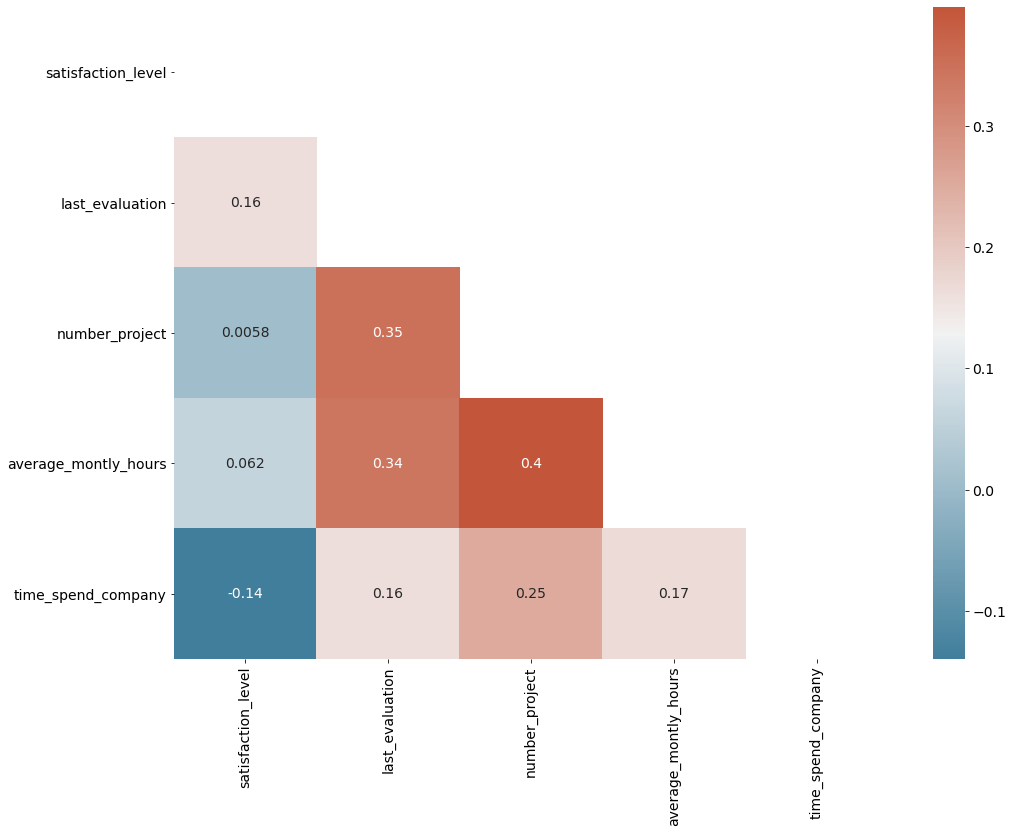

In [62]:
hr_df_corr = hr_quant.corr(method='spearman')

fig, ax = plt.subplots(figsize=(16,12))

mask = np.triu(np.ones_like(hr_df_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(hr_df_corr, ax=ax, annot=True, mask=mask, cmap=cmap)

In [155]:
# min_corr_by_features = hr_df_corr.min().abs().sort_values(ascending=True)
# min_corr, min_corr_feature = min_corr_by_features[0], min_corr_by_features.index[0]
# print(min_corr, min_corr_feature)
#

0.005785844747730765 number_project


In [158]:
# hr_df_corr[ hr_df_corr[min_corr_feature] == min_corr ].index


Index(['satisfaction_level'], dtype='object')

In [12]:
# hr_df_corr_columns = list(hr_df_corr.abs().columns)
# hr_df_corr_idx = list(hr_df_corr.index) # повторяет порядок колонок
# all_corr = dict()
#
# for col in hr_df_corr_columns:
#     for idx in hr_df_corr_idx:
#         all_corr[(col, idx)]= hr_df_corr.loc[col, idx]
# all_corr

{('satisfaction_level', 'satisfaction_level'): 1.0,
 ('satisfaction_level', 'last_evaluation'): 0.16240691595012116,
 ('satisfaction_level', 'number_project'): 0.005785844747730765,
 ('satisfaction_level', 'average_montly_hours'): 0.061999586832770036,
 ('satisfaction_level', 'time_spend_company'): -0.13942791689576375,
 ('last_evaluation', 'satisfaction_level'): 0.16240691595012116,
 ('last_evaluation', 'last_evaluation'): 1.0,
 ('last_evaluation', 'number_project'): 0.350399265320877,
 ('last_evaluation', 'average_montly_hours'): 0.342061328238957,
 ('last_evaluation', 'time_spend_company'): 0.1611541324187696,
 ('number_project', 'satisfaction_level'): 0.005785844747730765,
 ('number_project', 'last_evaluation'): 0.350399265320877,
 ('number_project', 'number_project'): 1.0,
 ('number_project', 'average_montly_hours'): 0.3978551973725825,
 ('number_project', 'time_spend_company'): 0.2519710068836046,
 ('average_montly_hours', 'satisfaction_level'): 0.061999586832770036,
 ('average_m

In [ ]:
# hr_df_corr
# mask


In [ ]:
# corr_values = np.tril(abs(hr_df_corr.values), -1)
# corr_values

In [64]:
corr_pairs = hr_df_corr.abs()\
    .where(
        np.triu(np.ones(hr_df_corr.shape), k=1).astype(bool)
            ).stack()\
            .reset_index()

corr_pairs.columns = ['feature1', 'feature2', 'abs_correlation']
corr_pairs

#создаем единичную матрицу той же размерности, что и hr_df_corr, трансформируем в верхнетриугольную
#заменяем 0 и 1 на булевые
#применяем функцию, которая заменяет значения на NaN там, где не сопадает условие (condition is false),
#т.е заменяем в исходной матрице значения до диагонали включительно на NaN
#stack - "сворачивает" колонки во второй уровень индекса, удаляет Nan'ы, получаем пары признаков, удаляем повторы
#сбрасываем индекс

,feature1,feature2,abs_correlation
0,satisfaction_level,last_evaluation,0.162407
1,satisfaction_level,number_project,0.005786
2,satisfaction_level,average_montly_hours,0.062000
3,satisfaction_level,time_spend_company,0.139428
4,last_evaluation,number_project,0.350399
5,last_evaluation,average_montly_hours,0.342061
6,last_evaluation,time_spend_company,0.161154
7,number_project,average_montly_hours,0.397855
8,number_project,time_spend_company,0.251971
9,average_montly_hours,time_spend_company,0.168750


In [77]:
min_corr = corr_pairs[ corr_pairs.abs_correlation == corr_pairs.abs_correlation.min() ]
max_corr = corr_pairs[ corr_pairs.abs_correlation == corr_pairs.abs_correlation.max() ]

print(
    f'Minimal correlation is {round(min_corr.iloc[0,2], 5)} for features: {min_corr.iloc[0,0]} and {min_corr.iloc[0,1]} \n'
    f'Maximal correlation is {round(max_corr.iloc[0,2], 5)} for features: {max_corr.iloc[0,0]} and {max_corr.iloc[0,1]}'
)



Minimal correlation is 0.00579 for features: satisfaction_level and number_project 
Maximal correlation is 0.39786 for features: number_project and average_montly_hours
